In [65]:
# visualize feature maps output from each block in the vgg model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims

model = VGG19()
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [32]:
ixs = [2, 5, 10, 15, 20]
outputs = [model.layers[i+1].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [34]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
image_path = '/content/drive/My Drive/Neural Style Transfer/Images/rotunda.jpg'
image = load_img(image_path, target_size=(224, 224))

In [0]:
image = img_to_array(image)
image = expand_dims(image, axis=0)
image = preprocess_input(image)

In [0]:
feature_maps = model.predict(image)

In [42]:
feature_maps.shape

(1, 224, 224, 64)

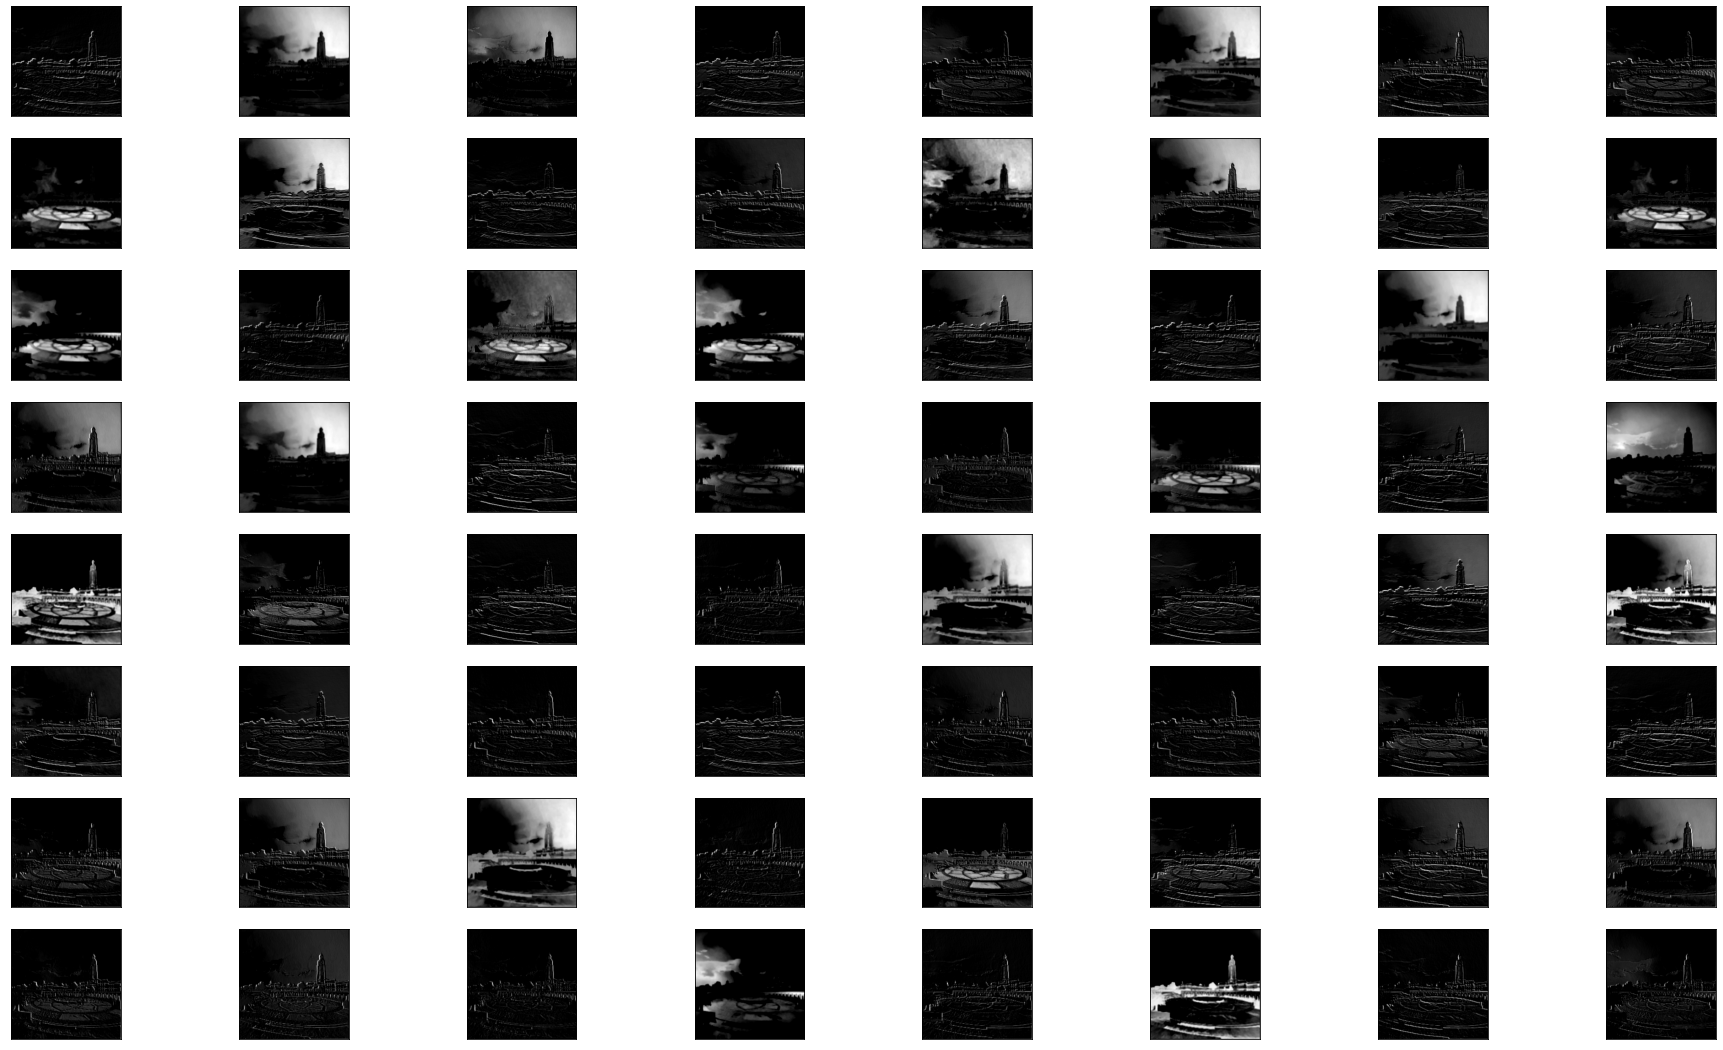

In [74]:
square = 8
fig = plt.figure(figsize=(32, 19))
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 0
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = fig.add_subplot(square, square, ix+1)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[:, :, ix], cmap='gray')
			ix += 1
	# show the figure 
	fig.show()

In [0]:
from google.colab import files
fig.savefig('fmap.png')
files.download('fmap.png')